In [80]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
from sklearn.metrics import accuracy_score

import shutil
import numpy as np

In [81]:
face_1 = cv2.imread('cropped_faces/s01_01.jpg')
face_1 = cv2.cvtColor(face_1, cv2.COLOR_BGR2RGB)

face_2 = cv2.imread('cropped_faces/s02_01.jpg')
face_2 = cv2.cvtColor(face_2, cv2.COLOR_BGR2RGB)

face_3 = cv2.imread('cropped_faces/s03_01.jpg')
face_3 = cv2.cvtColor(face_3, cv2.COLOR_BGR2RGB)

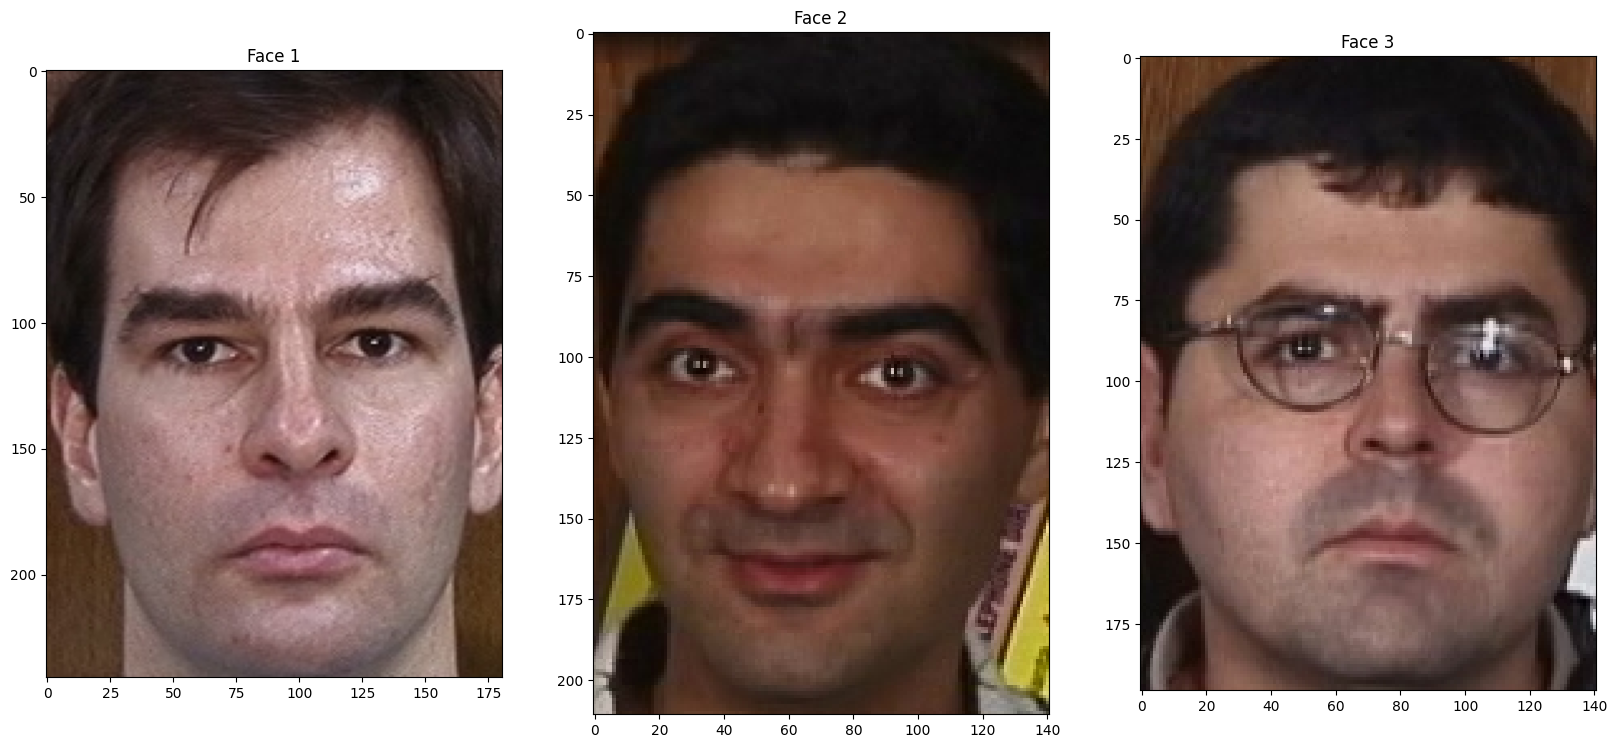

In [82]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Face 1')
plt.imshow(face_1)

plt.subplot(132)
plt.title('Face 2')
plt.imshow(face_2)

plt.subplot(133)
plt.title('Face 3')
plt.imshow(face_3)


plt.show()

In [83]:
face_1.shape, face_2.shape, face_3.shape    

((241, 181, 3), (211, 141, 3), (196, 141, 3))

# **Resizing images**

In [84]:
faces_path = 'cropped_faces/'

arq_faces = [f for f in listdir(faces_path) if isfile(join(faces_path, f))]

In [85]:
len(arq_faces)

750

In [86]:
train_faces_path = 'images/train/'
test_faces_path = 'images/test/'

if not path.exists(train_faces_path):
    makedirs(train_faces_path)

if not path.exists(test_faces_path):
    makedirs(test_faces_path)


for arq in arq_faces:
    person = arq[1:3]
    number = arq[4:6]

    if int(number) <= 10:
        shutil.copyfile(faces_path + arq, train_faces_path + arq)
    else:
        shutil.copyfile(faces_path + arq, test_faces_path + arq)

In [87]:
def stand_images(faces_path):
    img = cv2.imread(faces_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return img

In [88]:
train_faces_list = [f for f in listdir(train_faces_path) if isfile(join(train_faces_path, f))]
test_faces_list = [f for f in listdir(test_faces_path) if isfile(join(test_faces_path,f))]

In [89]:
train_faces_list[0]

's40_09.jpg'

In [90]:
test_faces_list[0]

's27_13.jpg'

In [91]:
train_data, sujeitos = [], []

In [92]:
for i, arq in enumerate(train_faces_list):
    img_path = train_faces_path + arq
    img = stand_images(img_path)
    train_data.append(img)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [93]:
len(train_data), len(sujeitos)

(500, 500)

In [94]:
test_data, sujeitos_test = [], []

In [95]:
for i, arq in enumerate(test_faces_list):
    img_path = test_faces_path + arq
    img = stand_images(img_path)
    test_data.append(img)
    sujeito = arq[1:3]
    sujeitos_test.append(int(sujeito))

In [96]:
len(test_data), len(sujeitos_test)

(250, 250)

Text(0.5, 1.0, 'Sujeito: 40')

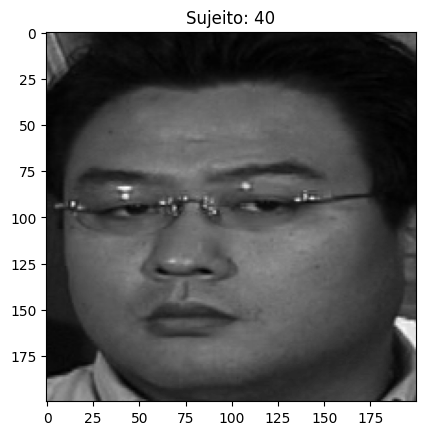

In [97]:
plt.imshow(train_data[0], cmap='gray')
plt.title(f'Sujeito: {sujeitos[0]}')

Text(0.5, 1.0, 'Sujeito: 27')

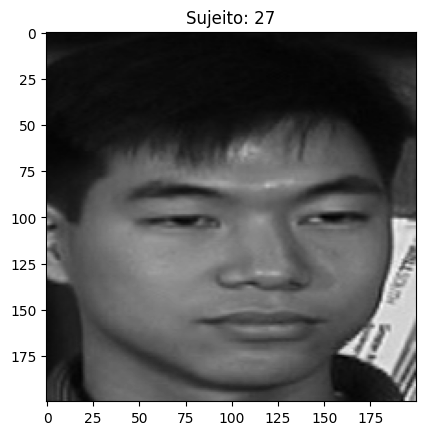

In [98]:
plt.imshow(test_data[0], cmap='gray')
plt.title(f'Sujeito: {sujeitos_test[0]}')

# **Eingenfaces classifier**

In [99]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_test = np.asarray(sujeitos_test, dtype=np.int32) 

In [100]:
eingenfaces_model = cv2.face.EigenFaceRecognizer_create()

len(train_data), len(sujeitos)

(500, 500)

In [101]:
eingenfaces_model.train(train_data, sujeitos)

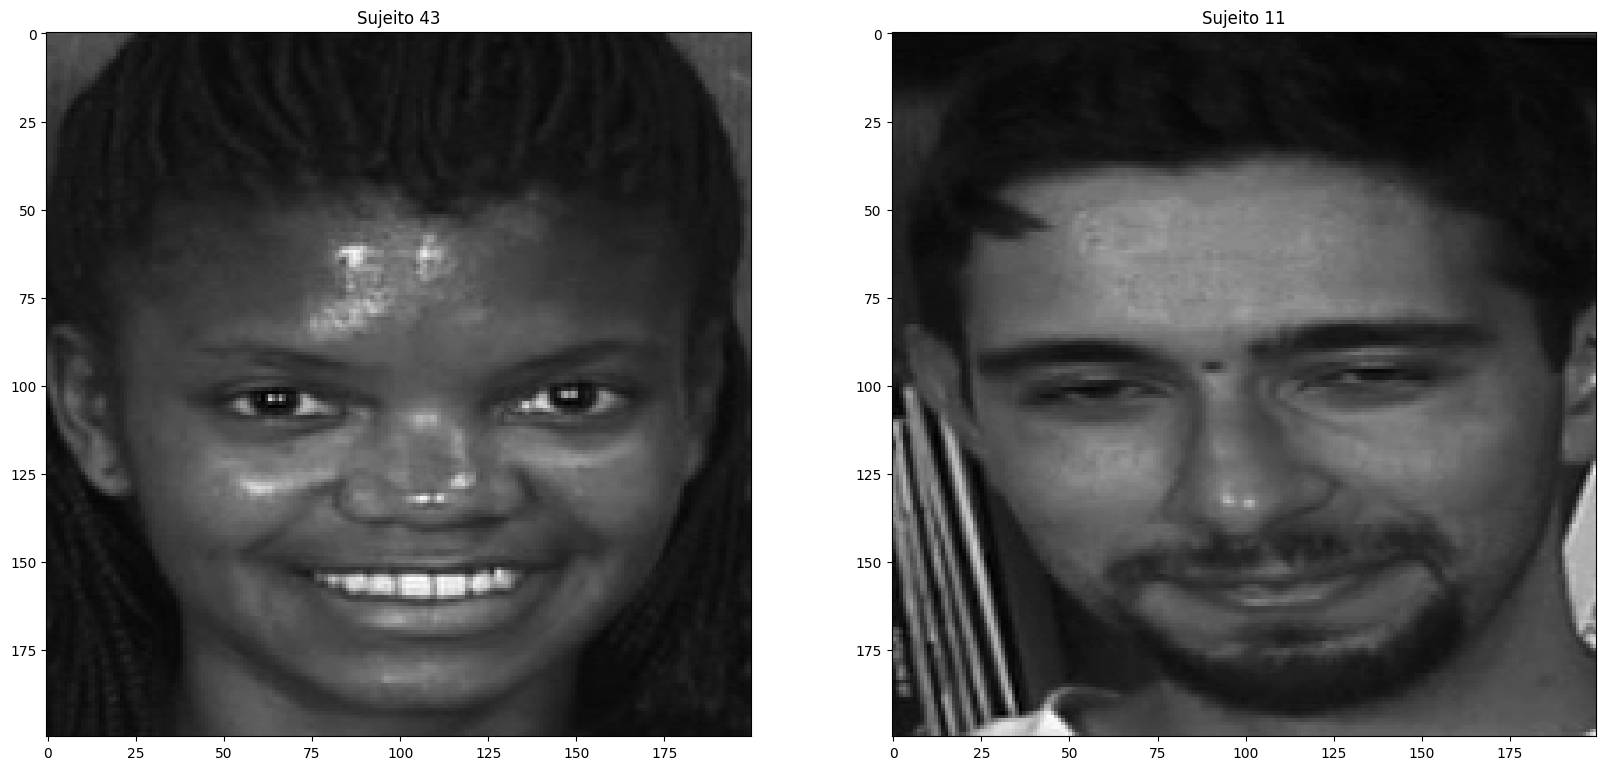

In [102]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_test[6]))
plt.imshow(test_data[6], cmap='gray')


plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_test[7]))
plt.imshow(test_data[7], cmap='gray')

In [103]:
predict = eingenfaces_model.predict(test_data[6])
predict

(43, 3477.5881307315526)

In [104]:
predict = eingenfaces_model.predict(test_data[7])
predict

(11, 4805.44383926491)

# **Fisherface classifier**

In [105]:
fisherface_model = cv2.face.FisherFaceRecognizer_create()
fisherface_model.train(train_data, sujeitos)

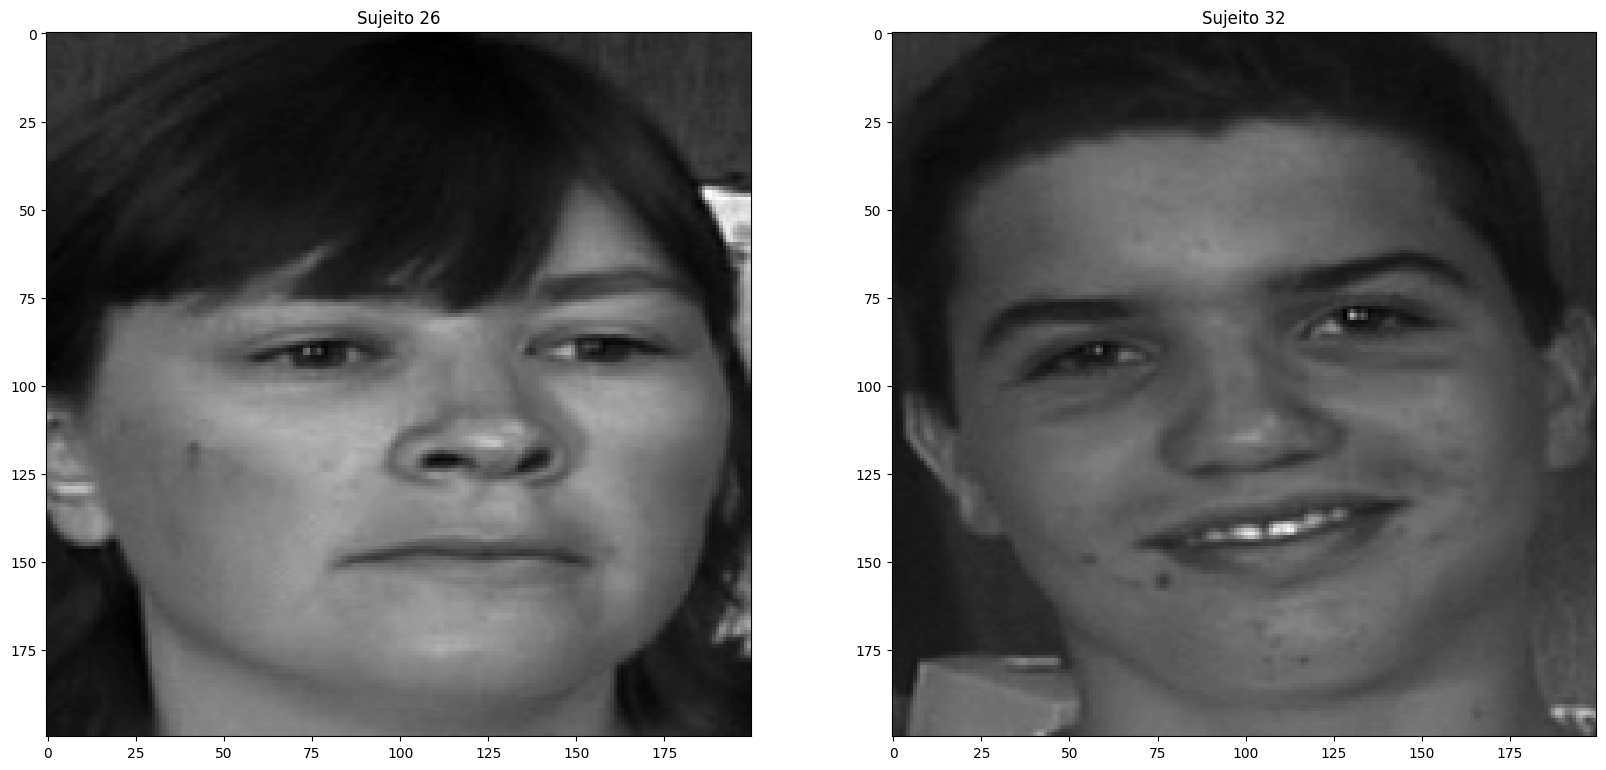

In [106]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_test[13]))
plt.imshow(test_data[13], cmap='gray')

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_test[19]))
plt.imshow(test_data[19], cmap='gray')

plt.show()

In [107]:
predict = fisherface_model.predict(test_data[13])
predict

(26, 1064.3794307777378)

In [108]:
predict = fisherface_model.predict(test_data[19])
predict

(32, 736.4731096964954)

In [109]:
lbph_model = cv2.face.LBPHFaceRecognizer_create()

In [110]:
lbph_model.train(train_data, sujeitos)

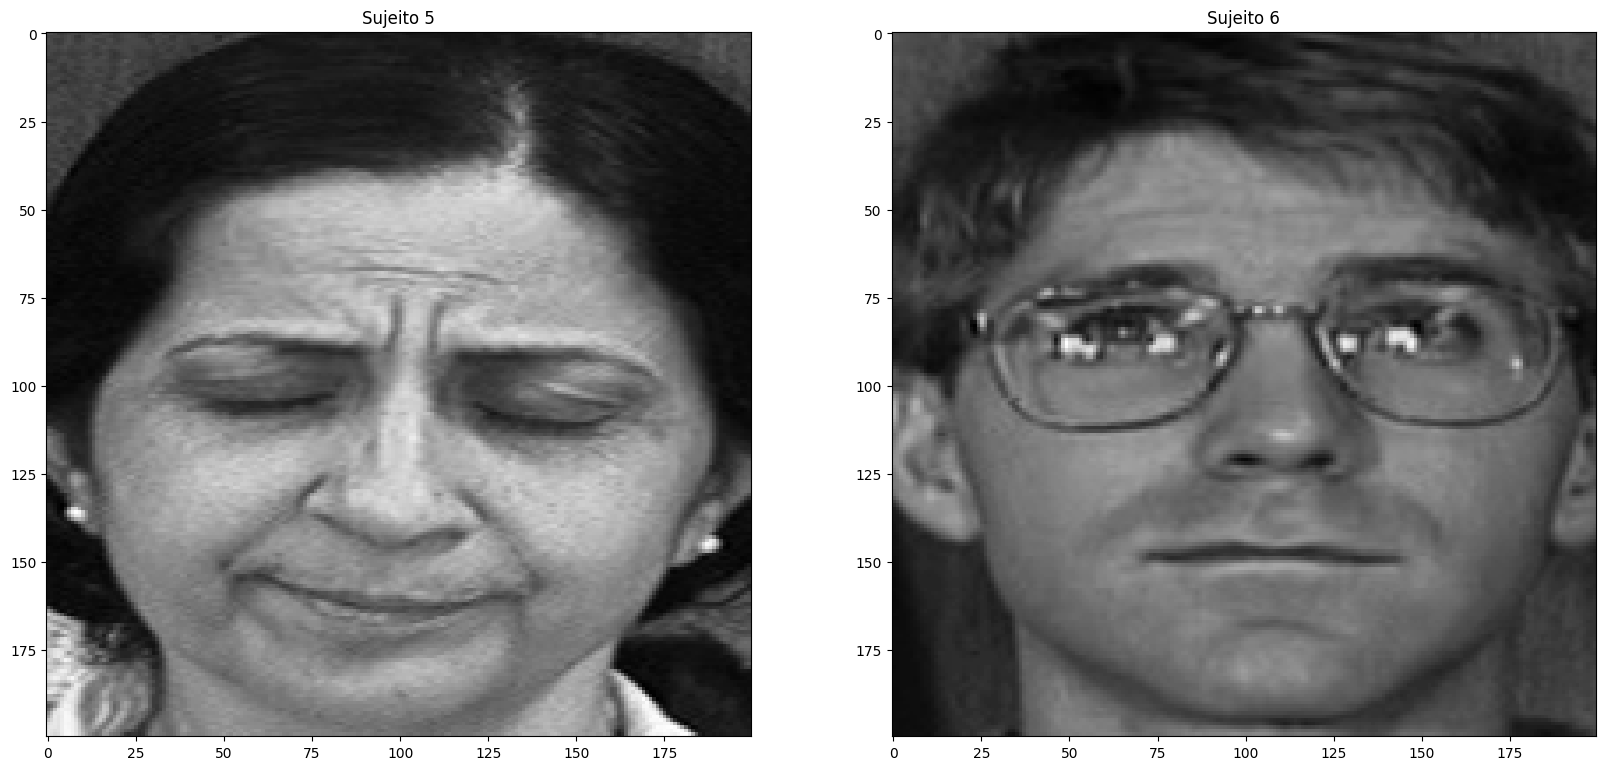

In [111]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_test[21]))
plt.imshow(test_data[21], cmap='gray')

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_test[28]))
plt.imshow(test_data[28], cmap='gray')

plt.show()

In [112]:
lbph_predic = lbph_model.predict(test_data[28])
lbph_predic

(6, 36.49919959564635)

# **Testing the models accuracy**

In [113]:
y_pred_eigenfaces = []

for item in test_data:
    y_pred_eigenfaces.append(eingenfaces_model.predict(item)[0])

In [114]:
eingenfaces_accuracy = accuracy_score(sujeitos_test, y_pred_eigenfaces)
eingenfaces_accuracy

0.724

### **For every 10 images, eigen gets approximately 7 right**

In [115]:
y_pred_fisherfaces = []

for item in test_data:
    y_pred_fisherfaces.append(fisherface_model.predict(item)[0])

In [116]:
fisherface_accuracy = accuracy_score(sujeitos_test, y_pred_fisherfaces)
fisherface_accuracy

0.52

### **For every 10 images, fishersface gets approximately 5 right**

In [117]:
y_pred_lbph = []

for item in test_data:
    y_pred_lbph.append(lbph_model.predict(item)[0])

In [118]:
lpbh_accuracy = accuracy_score(sujeitos_test, y_pred_lbph)
lpbh_accuracy

0.792

### **For every 10 images, fishersface gets approximately 7 right (Hitting almost 8, better than eigen)**